In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from RAVEN.pe.appr_taylor_utils import *
import matplotlib.pyplot as plt

# Test for RoundingNoGrad

In [23]:
input = torch.tensor([0.51, 0.49, -0.51, -0.49])
print("ceil :", RoundingNoGrad.apply(input, "ceil"))
print("floor:", RoundingNoGrad.apply(input, "floor"))
print("round:", RoundingNoGrad.apply(input, "round"))

ceil : tensor([1., 1., -0., -0.])
floor: tensor([ 0.,  0., -1., -1.])
round: tensor([ 1.,  0., -1., -0.])


# Test for Trunc

In [46]:
input = torch.tensor([0.751, 0.749, -0.751, -0.749, 0.759, 0.741, -0.759, -0.741])
print(Trunc(input, intwidth=1, fracwidth=2, rounding="ceil"))
print(Trunc(input, intwidth=1, fracwidth=2, rounding="floor"))
print(Trunc(input, intwidth=1, fracwidth=2, rounding="round"))

tensor([ 1.0000,  0.7500, -0.7500, -0.5000,  1.0000,  0.7500, -0.7500, -0.5000])
tensor([ 0.7500,  0.5000, -1.0000, -0.7500,  0.7500,  0.5000, -1.0000, -0.7500])
tensor([ 0.7500,  0.7500, -0.7500, -0.7500,  0.7500,  0.7500, -0.7500, -0.7500])


# Test for Appr_Taylor

In [3]:
a = torch.arange(0, 1, 0.001).cuda()
a_int = a.floor()

precise = torch.exp(a)

point = torch.tensor(0.)
scale = torch.exp(a_int + point)
const = torch.tensor(1.0)
input = a - point

coeff = [1/1, 1/2, 1/4, 1/8, 1/16, 1/32]
power = [1  ,   2,   3,   4,    5,    5]
sign  = [1  ,   1,   1,  -1,    1,    1]

approximate = Appr_Taylor(scale, 
                          const, 
                          input, 
                          coeff, 
                          power, 
                          sign, 
                          fxp=True, 
                          intwidth=7, 
                          fracwidth=8, 
                          rounding="round", 
                          keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

min error rate: tensor(-0.0043, device='cuda:0')
max error rate: tensor(0.0060, device='cuda:0')
avg error rate: tensor(0.0007, device='cuda:0')
rms error rate: tensor(0.0018, device='cuda:0')


# exp parameter generate

1. exp_data_gen test

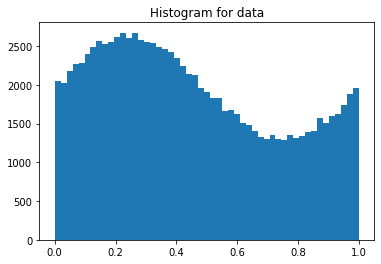

In [266]:
data = exp_data_gen("left")
fig = plt.hist(data.cpu().numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for data")
plt.show()

2. exp_param_gen test

In [3]:
exp_param_gen(distribution="right", intwidth=7, fracwidth=12, rounding="round", keepwidth=True, valid=True)

Approximate Taylor series at point: 0.0
final coeff [1.0, 0.5, 0.25, 0.03125, 0.0078125, 0.001953125]
final power [1, 2, 3, 3, 3, 3]
final sign [1, 1, 1, -1, -1, -1]
min error: ['-0.08460', '-0.00023', '-0.00023', '-0.00289', '-0.00361', '-0.00343']
max error: ['-0.00000', '0.01191', '0.00341', '0.00229', '0.00203', '0.00203']
avg error: ['-0.03053', '0.00600', '0.00181', '0.00077', '0.00052', '0.00056']
rms error: ['0.03858', '0.00729', '0.00213', '0.00130', '0.00125', '0.00123']

Approximate Taylor series at point: 0.125
final coeff [1.0, 0.5, 0.25, 0.0625, 0.0078125, 0.00390625]
final power [1, 2, 3, 4, 5, 5]
final sign [1, 1, 1, -1, 1, -1]
min error: ['-0.06395', '-0.00051', '-0.00453', '-0.00280', '-0.00361', '-0.00341']
max error: ['0.00006', '0.01108', '0.00242', '0.00267', '0.00254', '0.00254']
avg error: ['-0.02092', '0.00434', '0.00062', '0.00095', '0.00079', '0.00082']
rms error: ['0.02700', '0.00571', '0.00152', '0.00151', '0.00149', '0.00148']

Approximate Taylor series at